In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carregar Dataset e Setup

In [2]:
df = pd.read_csv("Data/group_22.csv")

# snapshot das colunas numéricas
num_df   = df.select_dtypes(include=[np.number]).copy()
num_cols = num_df.columns

# colunas categóricas
cat_cols = [c for c in df.columns if c not in num_cols]

# colunas continuas
cont_cols = [
    "duration_log_z", "loudness_yeo", "temp_zscore", "energy_rank_pct", "mood_pca",
    "artists_avg_popularity", "movement_index", "intensity_level", "verbal_density",
    "positivity_index", "signal_power"
]
# colunas discretas
disc_cols = ["popularity_level", "tempo_class", "time_signature", "mood_cluster",
             "acoustic_valence_mood_cluster", "tempo_vs_genre", "key_mode"]

# colunas binárias
bin_cols  = ["explicit", "is_instrumental", "is_dance_hit", "mode_indicator",
             "time_signature_class_boolean"]

#colunas alvo
targets   = ["target_class", "target_regression"]

# Dataframe para tendência central
central_tendency = pd.DataFrame(index=num_cols)

# DataFrame de para disperção
disp = pd.DataFrame(index=num_cols)


## 1. Estatisticas Descritivas

**Objetivo.** Resumir o dataset em três frentes:


### 1.1 Tendência central
*média*, *mediana*, *moda* 

In [3]:
# media e mediana e moda por coluna
central_tendency["mean"] = df[num_cols].mean()
central_tendency["median"] = df[num_cols].median()
central_tendency["mode"] = df[num_cols].mode(dropna=True).iloc[0]
central_tendency


,mean,median,mode
duration_1,6.733333e-02,0.000000e+00,0.000000
duration_2,1.713333e-01,0.000000e+00,0.000000
duration_3,3.190000e-01,0.000000e+00,0.000000
duration_4,4.263333e-01,0.000000e+00,0.000000
duration_5,1.600000e-02,0.000000e+00,0.000000
loudness_level,1.714000e+00,2.000000e+00,2.000000
popularity_level,2.043000e+00,2.000000e+00,3.000000
tempo_class,1.018000e+00,1.000000e+00,1.000000
time_signature,7.697062e-02,2.218242e-01,0.221824
key_mode,-1.977656e-02,-7.678645e-02,0.485996


### 1.2 Disperção

#### 1.2.1 Min e Max
  
Valores mínimo e máximo observados por coluna. Úteis para perceber limites mas sensíveis a outliers.


In [4]:
disp["min"]=df[num_cols].min()
disp["max"]=df[num_cols].max()
disp

,min,max
duration_1,0.000000,1.000000
duration_2,0.000000,1.000000
duration_3,0.000000,1.000000
duration_4,0.000000,1.000000
duration_5,0.000000,1.000000
loudness_level,0.000000,4.000000
popularity_level,0.000000,4.000000
tempo_class,0.000000,3.000000
time_signature,-6.712656,2.533318
key_mode,-1.511882,1.611562


#### 1.2.2 Amplitude

Amplitude total dos dados. Muito simples e muito sensível a outliers. `Amplitude = max - min` 


In [5]:
disp["range"]= disp["max"] - disp["min"]
disp

,min,max,range
duration_1,0.000000,1.000000,1.000000
duration_2,0.000000,1.000000,1.000000
duration_3,0.000000,1.000000,1.000000
duration_4,0.000000,1.000000,1.000000
duration_5,0.000000,1.000000,1.000000
loudness_level,0.000000,4.000000,4.000000
popularity_level,0.000000,4.000000,4.000000
tempo_class,0.000000,3.000000,3.000000
time_signature,-6.712656,2.533318,9.245973
key_mode,-1.511882,1.611562,3.123444


#### 1.2.3 Variancia

Média do quadrado dos desvios à média; mede dispersão em unidades ao quadrado.  

Exemplo  
Dados: [2, 4, 4, 4, 5, 5, 7, 9]

Média \\(\bar{x}=5\\).  
Desvios: \\([-3,-1,-1,-1,0,0,2,4]\\).  
Quadrados: \\([9,1,1,1,0,0,4,16]\\). Soma \\(=32\\).

**Variância amostral:** \\(\frac{32}{7}\approx 4.5714\\) (correção de Bessel \\({N-1})\\)

In [6]:
disp["variance"]= df[num_cols].var()
disp

,min,max,range,variance
duration_1,0.000000,1.000000,1.000000,6.282050e-02
duration_2,0.000000,1.000000,1.000000,1.420256e-01
duration_3,0.000000,1.000000,1.000000,2.173114e-01
duration_4,0.000000,1.000000,1.000000,2.446548e-01
duration_5,0.000000,1.000000,1.000000,1.574925e-02
loudness_level,0.000000,4.000000,4.000000,1.816143e+00
popularity_level,0.000000,4.000000,4.000000,9.534688e-01
tempo_class,0.000000,3.000000,3.000000,6.102968e-02
time_signature,-6.712656,2.533318,9.245973,6.132580e-01
key_mode,-1.511882,1.611562,3.123444,1.010088e+00


#### 1.2.4 Desvio-Padrão

Mede a disperção média da média do dados.
Raiz quadrada da variância volta às mesmas unidades da variável.

Dados: `[2, 4, 4, 4, 5, 5, 7, 9]`  
Média \\(\bar{x}=5\\). Quadrados dos desvios somam **32**.
- **Variância amostral:** \\(32/7 \approx 4{,}5714\\)  
- **Desvio-padrão amostral:** \\(\sqrt{4{,}5714}\approx 2{,}138\\)


In [7]:
disp["std"]= df[num_cols].std()
disp

,min,max,range,variance,std
duration_1,0.000000,1.000000,1.000000,6.282050e-02,0.250640
duration_2,0.000000,1.000000,1.000000,1.420256e-01,0.376863
duration_3,0.000000,1.000000,1.000000,2.173114e-01,0.466167
duration_4,0.000000,1.000000,1.000000,2.446548e-01,0.494626
duration_5,0.000000,1.000000,1.000000,1.574925e-02,0.125496
loudness_level,0.000000,4.000000,4.000000,1.816143e+00,1.347643
popularity_level,0.000000,4.000000,4.000000,9.534688e-01,0.976457
tempo_class,0.000000,3.000000,3.000000,6.102968e-02,0.247042
time_signature,-6.712656,2.533318,9.245973,6.132580e-01,0.783108
key_mode,-1.511882,1.611562,3.123444,1.010088e+00,1.005031


#### 1.2.5 Quantis e Quartis

quantis dividem a distribuição em **frações**.  
O quantil de ordem \\(p\\) (com \\(0 \le p \le 1\\)) é o valor abaixo do qual está **p·100%** dos dados.

- **Mediana** = quantil **0.5** (50.º percentil).
- **Quartis:**  
  - \\(Q_1\\) = quantil **0.25** (25.º percentil)  
  - \\(Q_3\\) = quantil **0.75** (75.º percentil)

O intervalo entre \\(Q_1\\) e \\(Q_3\\) capta o “**miolo**” dos dados (50% central).

Os dados são colocados por ordem (do mais pequeno para o maior).  
No quantil 0.25 (25%), cerca de um quarto dos valores fica abaixo deste ponto.


In [8]:
disp["q1"]= df[num_cols].quantile(0.25)
disp["q2 (median)"]= df[num_cols].quantile(0.50)
disp["q3"] = df[num_cols].quantile(0.75)
disp

,min,max,range,variance,std,q1,q2 (median),q3
duration_1,0.000000,1.000000,1.000000,6.282050e-02,0.250640,0.000000,0.000000e+00,0.000000
duration_2,0.000000,1.000000,1.000000,1.420256e-01,0.376863,0.000000,0.000000e+00,0.000000
duration_3,0.000000,1.000000,1.000000,2.173114e-01,0.466167,0.000000,0.000000e+00,1.000000
duration_4,0.000000,1.000000,1.000000,2.446548e-01,0.494626,0.000000,0.000000e+00,1.000000
duration_5,0.000000,1.000000,1.000000,1.574925e-02,0.125496,0.000000,0.000000e+00,0.000000
loudness_level,0.000000,4.000000,4.000000,1.816143e+00,1.347643,1.000000,2.000000e+00,3.000000
popularity_level,0.000000,4.000000,4.000000,9.534688e-01,0.976457,1.000000,2.000000e+00,3.000000
tempo_class,0.000000,3.000000,3.000000,6.102968e-02,0.247042,1.000000,1.000000e+00,1.000000
time_signature,-6.712656,2.533318,9.245973,6.132580e-01,0.783108,0.221824,2.218242e-01,0.221824
key_mode,-1.511882,1.611562,3.123444,1.010088e+00,1.005031,-0.920961,-7.678645e-02,0.767388


#### 1.2.6 Intervalo Interquartil (Quartil Range)

**Definição:** \\( \mathrm{IQR} = Q_3 - Q_1 \\). Mede a **largura do miolo central (50%)** dos dados.  
É **robusto a outliers** (não depende de mínimos/máximos).

IQR **grande** ⇒ dados mais espalhados na parte central.
IQR **pequeno** ⇒ dados concentrados perto da mediana.

**Limites e Outliers:**
- Limite inferior: \\( \text{LI} = Q_1 - 1.5 \times \mathrm{IQR} \\)
- Limite superior: \\( \text{LS} = Q_3 + 1.5 \times \mathrm{IQR} \\)

Valores fora de \\([ \text{LI}, \text{LS} ]\\) são marcados como outliers.

In [9]:
# intervalo
disp["IQR"] = disp["q3"] - disp["q1"]

# limites
disp["LI"] = disp["q1"] - 1.5 * disp["IQR"]   # limite inferior
disp["LS"] = disp["q3"] + 1.5 * disp["IQR"]   # limite superior

# ouliers
mask_lower = num_df.lt(disp["LI"], axis=1)  # cada coluna compara com o seu LI
mask_upper = num_df.gt(disp["LS"], axis=1)  # idem para LS
disp["outlier %"] = (mask_lower | mask_upper).mean(axis=0) * 100  # % por coluna
disp

,min,max,range,variance,std,q1,q2 (median),q3,IQR,LI,LS,outlier %
duration_1,0.000000,1.000000,1.000000,6.282050e-02,0.250640,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,6.733333
duration_2,0.000000,1.000000,1.000000,1.420256e-01,0.376863,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,17.133333
duration_3,0.000000,1.000000,1.000000,2.173114e-01,0.466167,0.000000,0.000000e+00,1.000000,1.000000,-1.500000,2.500000,0.000000
duration_4,0.000000,1.000000,1.000000,2.446548e-01,0.494626,0.000000,0.000000e+00,1.000000,1.000000,-1.500000,2.500000,0.000000
duration_5,0.000000,1.000000,1.000000,1.574925e-02,0.125496,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.600000
loudness_level,0.000000,4.000000,4.000000,1.816143e+00,1.347643,1.000000,2.000000e+00,3.000000,2.000000,-2.000000,6.000000,0.000000
popularity_level,0.000000,4.000000,4.000000,9.534688e-01,0.976457,1.000000,2.000000e+00,3.000000,2.000000,-2.000000,6.000000,0.000000
tempo_class,0.000000,3.000000,3.000000,6.102968e-02,0.247042,1.000000,1.000000e+00,1.000000,0.000000,1.000000,1.000000,5.933333
time_signature,-6.712656,2.533318,9.245973,6.132580e-01,0.783108,0.221824,2.218242e-01,0.221824,0.000000,0.221824,0.221824,6.800000
key_mode,-1.511882,1.611562,3.123444,1.010088e+00,1.005031,-0.920961,-7.678645e-02,0.767388,1.688348,-3.453483,3.299910,0.000000


#### 1.2.7 Função MAD (Median Absolute Deviation)
Dispersão robusta, útil por ser pouco influenciada por valores extremos (`median(|x − median(x)|)`)  
Boa alternativa ao desvio padrão quando a distribuição é assimétrica ou com outliers.

In [10]:
disp["MAD"]= (num_df - num_df.median()).abs().median() # ou num_df.sub(num_df.median(), axis=1).abs().median() com axis para ficar explicito
disp

,min,max,range,variance,std,q1,q2 (median),q3,IQR,LI,LS,outlier %,MAD
duration_1,0.000000,1.000000,1.000000,6.282050e-02,0.250640,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,6.733333,0.000000
duration_2,0.000000,1.000000,1.000000,1.420256e-01,0.376863,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,17.133333,0.000000
duration_3,0.000000,1.000000,1.000000,2.173114e-01,0.466167,0.000000,0.000000e+00,1.000000,1.000000,-1.500000,2.500000,0.000000,0.000000
duration_4,0.000000,1.000000,1.000000,2.446548e-01,0.494626,0.000000,0.000000e+00,1.000000,1.000000,-1.500000,2.500000,0.000000,0.000000
duration_5,0.000000,1.000000,1.000000,1.574925e-02,0.125496,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.600000,0.000000
loudness_level,0.000000,4.000000,4.000000,1.816143e+00,1.347643,1.000000,2.000000e+00,3.000000,2.000000,-2.000000,6.000000,0.000000,1.000000
popularity_level,0.000000,4.000000,4.000000,9.534688e-01,0.976457,1.000000,2.000000e+00,3.000000,2.000000,-2.000000,6.000000,0.000000,1.000000
tempo_class,0.000000,3.000000,3.000000,6.102968e-02,0.247042,1.000000,1.000000e+00,1.000000,0.000000,1.000000,1.000000,5.933333,0.000000
time_signature,-6.712656,2.533318,9.245973,6.132580e-01,0.783108,0.221824,2.218242e-01,0.221824,0.000000,0.221824,0.221824,6.800000,0.000000
key_mode,-1.511882,1.611562,3.123444,1.010088e+00,1.005031,-0.920961,-7.678645e-02,0.767388,1.688348,-3.453483,3.299910,0.000000,0.844174


#### 1.2.8 Coeficiente de Variação

\\( \mathrm{CV} = \dfrac{\text{desvio-padrão}}{|\text{média}|} \\).

Mede variabilidade relativa, sem unidades. Isto permite comparar colunas em escalas diferentes.

In [11]:
disp["CV"] = disp["std"] / num_df.mean().abs()
disp

,min,max,range,variance,std,q1,q2 (median),q3,IQR,LI,LS,outlier %,MAD,CV
duration_1,0.000000,1.000000,1.000000,6.282050e-02,0.250640,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,6.733333,0.000000,3.722379e+00
duration_2,0.000000,1.000000,1.000000,1.420256e-01,0.376863,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,17.133333,0.000000,2.199588e+00
duration_3,0.000000,1.000000,1.000000,2.173114e-01,0.466167,0.000000,0.000000e+00,1.000000,1.000000,-1.500000,2.500000,0.000000,0.000000,1.461338e+00
duration_4,0.000000,1.000000,1.000000,2.446548e-01,0.494626,0.000000,0.000000e+00,1.000000,1.000000,-1.500000,2.500000,0.000000,0.000000,1.160186e+00
duration_5,0.000000,1.000000,1.000000,1.574925e-02,0.125496,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.600000,0.000000,7.843501e+00
loudness_level,0.000000,4.000000,4.000000,1.816143e+00,1.347643,1.000000,2.000000e+00,3.000000,2.000000,-2.000000,6.000000,0.000000,1.000000,7.862564e-01
popularity_level,0.000000,4.000000,4.000000,9.534688e-01,0.976457,1.000000,2.000000e+00,3.000000,2.000000,-2.000000,6.000000,0.000000,1.000000,4.779527e-01
tempo_class,0.000000,3.000000,3.000000,6.102968e-02,0.247042,1.000000,1.000000e+00,1.000000,0.000000,1.000000,1.000000,5.933333,0.000000,2.426737e-01
time_signature,-6.712656,2.533318,9.245973,6.132580e-01,0.783108,0.221824,2.218242e-01,0.221824,0.000000,0.221824,0.221824,6.800000,0.000000,1.017412e+01
key_mode,-1.511882,1.611562,3.123444,1.010088e+00,1.005031,-0.920961,-7.678645e-02,0.767388,1.688348,-3.453483,3.299910,0.000000,0.844174,5.081931e+01


## 2 Univariate Analysis

Distribuição de cada variável de forma isolada:
- Numéricas: histograma + KDE, boxplot, quantis (Q1/Mediana/Q3).
- Categóricas: barras (Top-N) com contagens e percentagens.

Isto ajuda a detetar enviesamentos (skew), outliers, zeros estruturais, classes raras e necessidade de transformações/normalização.

### 2.1 Análise de colunas continuas

Para a análise de colunas continuas podemos usar Histogramas com KDE e Boxplot para visualizarmos o IQR e outliers.

- duration_log_z
- loudness_yeo
- temp_zscore
- energy_rank_pct
- mood_pca
- artists_avg_popularity
- movement_index
- intensity_level
- verbal_density
- positivity_index
- signal_power

#### 2.1.1 duration_log_z

Uma vez que a duração já em log e normalizada (z-score); espera-se forma ~normal.  
**Observar:** simetria, caudas, outliers residuais.

In [12]:
col = "duration_log_z"
x = df[col].dropna().astype(float)

# estatísticas
count  = x.size
mean   = x.mean()
std    = x.std(ddof=1)
q1     = x.quantile(0.25)
median = x.quantile(0.50)
q3     = x.quantile(0.75)
skew   = x.skew()
kurt   = x.kurtosis()

stats_txt = (
    f"count: {count}\n"
    f"mean: {mean:.3f}\n"
    f"std: {std:.3f}\n"
    f"Q1: {q1:.3f}\n"
    f"median: {median:.3f}\n"
    f"Q3: {q3:.3f}\n"
    f"skew: {skew:.2f}\n"
    f"kurt: {kurt:.2f}"
)

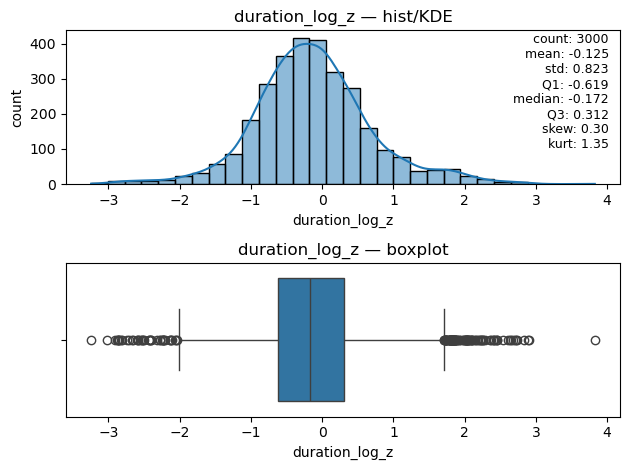

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1)

# HIST + KDE
sns.histplot(x, bins=30, kde=True, ax=ax1)
ax1.set(title=f"{col} — hist/KDE", ylabel="count")

ax1.text(
    0.98, 0.98, stats_txt,
    transform=ax1.transAxes, ha="right", va="top", fontsize=9,
)

# BOXPLOT
sns.boxplot(x=x, ax=ax2)
ax2.set(title=f"{col} — boxplot", xlabel=col, ylabel="")

plt.tight_layout()
plt.show()

**skew** (assimetria) de 0.30 mostra uma ligeira cauda à direita mas é praticamente simétrico.
**kurt** (curtose) de 1.35 revela uma leptocúrtica moderada com caudas um ligeiramente mais pesadas que Normal (> 0).

**Média** de -0.125 maior que a mediana mediana mais uma vez mostrando-se consistente com a leve assimetria à direita.

O **histograma** está muito próximo de forma normal.  
O **Boxplot** revela um numero considerável de outliers em ambas as caudas.

### 2.1.2 loudness_yeo

In [14]:
col = "loudness_yeo"
x = df[col].dropna().astype(float)

# estatísticas
count  = x.size
mean   = x.mean()
std    = x.std(ddof=1)
q1     = x.quantile(0.25)
median = x.quantile(0.50)
q3     = x.quantile(0.75)
skew   = x.skew()
kurt   = x.kurtosis()

stats_txt = (
    f"count: {count}\n"
    f"mean: {mean:.3f}\n"
    f"std: {std:.3f}\n"
    f"Q1: {q1:.3f}\n"
    f"median: {median:.3f}\n"
    f"Q3: {q3:.3f}\n"
    f"skew: {skew:.2f}\n"
    f"kurt: {kurt:.2f}"
)

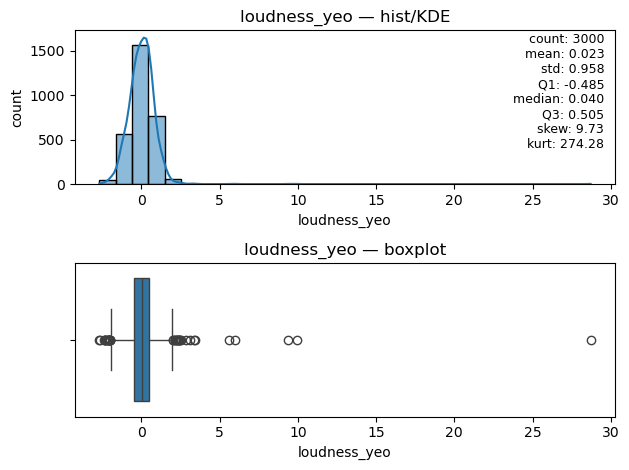

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1)

# HIST + KDE
sns.histplot(x, bins=30, kde=True, ax=ax1)
ax1.set(title=f"{col} — hist/KDE", ylabel="count")

ax1.text(
    0.98, 0.98, stats_txt,
    transform=ax1.transAxes, ha="right", va="top", fontsize=9,
)

# BOXPLOT
sns.boxplot(x=x, ax=ax2)
ax2.set(title=f"{col} — boxplot", xlabel=col, ylabel="")

plt.tight_layout()
plt.show()

**skew** (assimetria)  9,7 indica forte cauda à direita.
**kurt** (curtose) 274 indica caudas longas.

O **histograma** mostra que o miolo anda perto de 0, mas o eixo chega a ~30 por causa de outliers grandes.  
O **boxplot** confirma que há muitos pontos fora do intervalo interquartil, sobretudo à direita, confirmando assim o skew e o kurt.

### 2.1.3 temp_zscore

`temp_zscore` é o tempo (BPM) normalizado:  
\\[
z = \frac{x - \text{média original}}{\text{desvio-padrão original}}
\\]
Depois desta conta, esperamos média ≈ 0 e desvio-padrão ≈ 1.

- O **histograma** espera-se estar centrado em 0 e sem caudas muito compridas.
- O **boxplot** não deve ter muitos pontos fora (outliers).
- A percentagem de valores extremos temos de analisar quantos têm |z| > 3 pois não é suposto estar muito longe do centro.

- A média deve andar perto de 0 e o desvio padrão perto de 1 (normalização).
- `skew` perto de 0 ou seja com uma distribuição simétrica.  
- Se `skew` estiver grande (>|1|) veremos uma cauda longa para um dos lados.
- **|z| > 3**:  
  - ≤ **1–2%** → normal, ignoro.  
  - > **2–3%** → muitos extremos; considerar tratar.


In [16]:
col = "temp_zscore"
x = df[col].dropna().astype(float)

# stats básicos
count  = x.size
mean   = x.mean()
std    = x.std(ddof=1)
q1     = x.quantile(0.25)
median = x.quantile(0.50)
q3     = x.quantile(0.75)
skew   = x.skew()
kurt   = x.kurtosis()

stats_txt = (
    f"count: {count}\n"
    f"mean: {mean:.3f}\n"
    f"std: {std:.3f}\n"
    f"Q1: {q1:.3f}\n"
    f"median: {median:.3f}\n"
    f"Q3: {q3:.3f}\n"
    f"skew: {skew:.2f}\n"
    f"kurt: {kurt:.2f}"
)

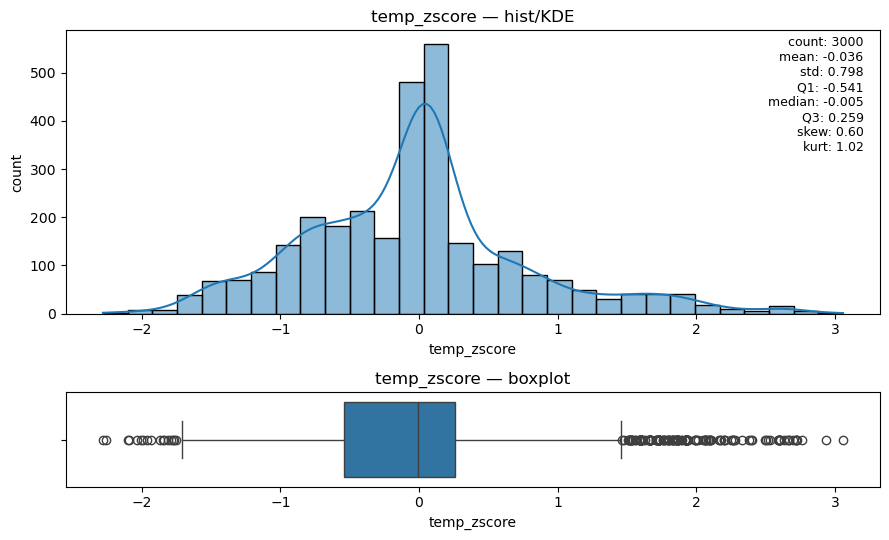

In [17]:
# figura com hist+KDE (topo) e boxplot (baixo), a partilhar o eixo x
fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(9, 5.5), gridspec_kw={"height_ratios": [3, 1]}, sharex=False
)

# HIST + KDE
sns.histplot(x, bins=30, kde=True, ax=ax1)
ax1.set(title=f"{col} — hist/KDE", ylabel="count")
ax1.text(0.98, 0.98, stats_txt, transform=ax1.transAxes,
         ha="right", va="top", fontsize=9)

# BOXPLOT
sns.boxplot(x=x, ax=ax2)
ax2.set(title=f"{col} — boxplot", xlabel=col, ylabel="")

plt.tight_layout()
plt.show()

**Média** ≈ −0,036, centrado muito perto de 0 (ok para z-score).  
**Std** ≈ 0,798 (não exatamente 1), podemos considerar normal pode acontecer se o z-score foi calculado noutro conjunto (e aqui é um subconjunto), ou a diferença de definição (ddof=0 na normalização vs ddof=1 que o pandas usa para std amostral) ou até arredondamentos e transformações feitas à postriori.  
**Skew** ≈ 0,60, ligeira cauda à direita.  
**Kurt** ≈ 1,02, caudas mais pesadas do que a Normal o que revela alguns pontos extremos.  
**Boxplot** confirma a existencia de outliers em ambas as caudas, mais pronunciados à direita.  

A distribuição está centrada próximo de 0 (mean −0,036) com std ≈ 0,80, o que é compatível com um z-score.
bserva-se uma assimetria moderada à direita (skew 0,60) e caudas algo pesadas (kurt 1,02), refletidas em alguns outliers no boxplot.  

### 2.1.3 energy_rank_pct

É o percentil do nível de energia da faixa em relação a um conjunto de músicas.  
Valores ~0 indicam energia mediana, negativos = abaixo da média e positivos = acima da média.  

Nesta analise espera se verificar se a distribuição é proxima de 0, se há poucos outliers e se o IQR dá a variabilidade central.


In [18]:
col = "energy_rank_pct"
x = df[col].dropna().astype(float)

# stats básicos
count  = x.size
mean   = x.mean()
std    = x.std(ddof=1)
q1     = x.quantile(0.25)
median = x.quantile(0.50)
q3     = x.quantile(0.75)
skew   = x.skew()
kurt   = x.kurtosis()

stats_txt = (
    f"count: {count}\n"
    f"mean: {mean:.3f}\n"
    f"std: {std:.3f}\n"
    f"Q1: {q1:.3f}\n"
    f"median: {median:.3f}\n"
    f"Q3: {q3:.3f}\n"
    f"skew: {skew:.2f}\n"
    f"kurt: {kurt:.2f}"
)

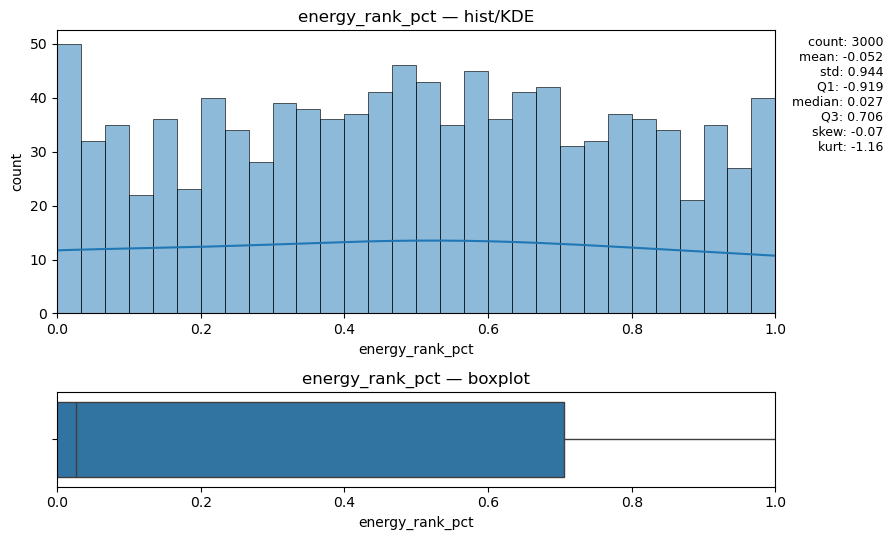

In [19]:
# figura com hist+KDE (em cima) e boxplot (baixo)
fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(9, 5.5), gridspec_kw={"height_ratios": [3, 1]}, sharex=False
)

# HIST + KDE (bins ajustados ao [0,1])
sns.histplot(x, bins=30, kde=True, binrange=(0,1), ax=ax1)
ax1.set(title=f"{col} — hist/KDE", ylabel="count", xlim=(0,1))
ax1.text(1.15, 0.98, stats_txt, transform=ax1.transAxes,ha="right", va="top", fontsize=9)

# BOXPLOT
sns.boxplot(x=x, ax=ax2)
ax2.set(title=f"{col} — boxplot", xlabel=col, ylabel="")
ax2.set_xlim(0,1)

plt.tight_layout()
plt.show()


A distribuição está próxima de simétrica (**skew** ≈ −0,07) e apresenta kurtose negativa (**kurt** ≈ −1,16), o que significa uma forma mais achatada e caudas mais leves do que a normal. O histograma sugere algo próximo de uniforme, sem picos acentuados. O boxplot mostra um **IQR** largo com uma variabilidade central elevada. As medidas centrais são coerentes com a **média** ≈ −0,05, o **desvio-padrão** ≈ 0,94, o **Q1** ≈ −0,92, a **mediana** ≈ 0,03 e o **Q3** ≈ 0,71.

Podemos então concluir que a a variável tem boa dispersão ao longo da faixa e não é dominada por extremos.
A uniformidade indica que os valores estão bem distribuídos e podem refletir diferentes perfis de energia sem concentração num intervalo estreito.
O facto de estar já centrada e escalada facilita o uso em modelos sensíveis à escala como regressões e SVM.

### 2.1.5 mood_pca
Componente principal (PCA) que resume variação relacionada com “mood”. Por definição espera-se estar centrada (≈ média 0) e em escala contínua.
  
Espera-se que o **Histogram** seja aproximadamente simétrico se a projeção combinar vários fatores.  
É possível haver multimodalidade (picos múltiplos) se caso hajam subgrupos (géneros/estilos) distintos.  
O **Boxplot** pode ter alguns extremos, mas sem dominar a distribuição.

In [20]:
col = "mood_pca"
x = df[col].dropna().astype(float)

# stats básicos
count  = x.size
mean   = x.mean()
std    = x.std(ddof=1)
q1     = x.quantile(0.25)
median = x.quantile(0.50)
q3     = x.quantile(0.75)
skew   = x.skew()
kurt   = x.kurtosis()

stats_txt = (
    f"count: {count}\n"
    f"mean: {mean:.3f}\n"
    f"std: {std:.3f}\n"
    f"Q1: {q1:.3f}\n"
    f"median: {median:.3f}\n"
    f"Q3: {q3:.3f}\n"
    f"skew: {skew:.2f}\n"
    f"kurt: {kurt:.2f}"
)

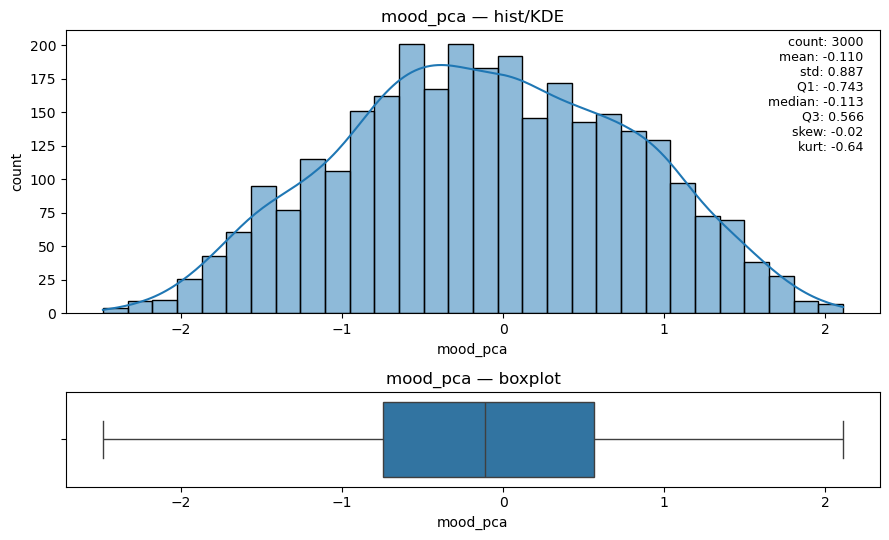

In [21]:
# figura com hist+KDE (em cima) e boxplot (em baixo)
fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(9, 5.5), gridspec_kw={"height_ratios": [3, 1]}, sharex=False
)

# HIST + KDE
sns.histplot(x, bins=30, kde=True, ax=ax1)
ax1.set(title=f"{col} — hist/KDE", ylabel="count")
ax1.text(0.98, 0.98, stats_txt, transform=ax1.transAxes,
         ha="right", va="top", fontsize=9)

# BOXPLOT
sns.boxplot(x=x, ax=ax2)
ax2.set(title=f"{col} — boxplot", xlabel=col, ylabel="")

plt.tight_layout()
plt.show()

**Média** ≈ −0,11, **std** ≈ 0,89, centrada perto de 0 revelando uma dispersão moderada.  
**Q1** ≈ −0,743, **Med** ≈ −0,113, **Q3** ≈ 0,566, com **IQR** ≈ 1,309 (um miolo relativamente largo).  
**Skew** ≈ −0,02, distribuição praticamente simétrica.  
**Kurt** ≈ −0,64, um pouco mais “achatada” que a distribuição Normal com caudas ligeiramente leves.  
**Histograma** com perfil unimodal.  
**Boxplot** sem outliers e caudas equilibradas.

Com esta informação podemos ver que a projeção PCA captou uma dimensão de “estado de humor” com distribuição muito próxima de normal, sem assimetrias relevantes, com boa variabilidade no centro (IQR amplo) e ausência de extremos dominantes.

### 2.1.6 artists_avg_popularity

Representa a popularidade média dos artistas da faixa. Espera-se ser assimétrica uma vez que por norma há muitos artistas pouco populares e poucos muito populares.

O **Histograma** vai ter muito provavelmente uma cauda à direita (skew>0).  
O **Boxplot** espera-se com alguns extremos altos.

In [21]:
col = "artists_avg_popularity"
x = df[col].dropna().astype(float)

# stats
count  = x.size
mean   = x.mean()
std    = x.std(ddof=1)
q1     = x.quantile(0.25)
median = x.quantile(0.50)
q3     = x.quantile(0.75)
skew   = x.skew()
kurt   = x.kurtosis()

stats_txt = (
    f"count: {count}\n"
    f"mean: {mean:.3f}\n"
    f"std: {std:.3f}\n"
    f"Q1: {q1:.3f}\n"
    f"median: {median:.3f}\n"
    f"Q3: {q3:.3f}\n"
    f"skew: {skew:.2f}\n"
    f"kurt: {kurt:.2f}"
)

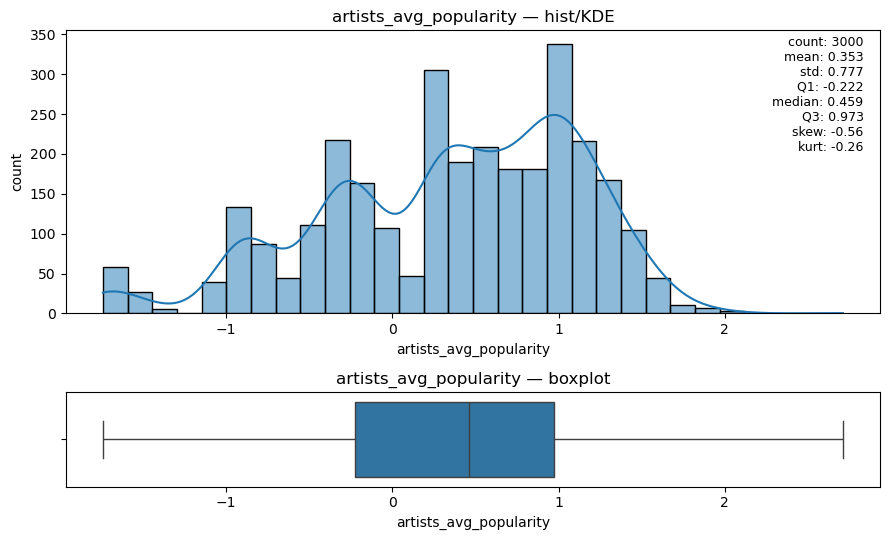

In [22]:
fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(9, 5.5), gridspec_kw={"height_ratios": [3, 1]}, sharex=False
)

# HIST + KDE
sns.histplot(x, bins=30, kde=True, ax=ax1)
ax1.set(title=f"{col} — hist/KDE", ylabel="count")
ax1.text(0.98, 0.98, stats_txt, transform=ax1.transAxes,
         ha="right", va="top", fontsize=9)

# BOXPLOT
sns.boxplot(x=x, ax=ax2)
ax2.set(title=f"{col} — boxplot", xlabel=col, ylabel="")

plt.tight_layout()
plt.show()

**mean** = 0,353 < **median** = 0,459 revela coerencia com assimetria à esquerda.  
**skew** ≈ −0,56, cauda mais longa para valores baixos revela artistas pouco populares.  
**kurt** ≈ −0,26, ligeiramente achatada.  
**Q1** = −0,222, **Q3** = 0,973 → **IQR** ≈ 1,195 (boa dispersão no miolo).  
**Boxplot**: alguns outliers em ambas as caudas, mais na esquerda.

A distribuição sugere muitos artistas com popularidade baixa e um grupo razoável com valores médios/altos; a densidade tem pequenas ondulações mostrando que pode haver subgrupos (género/época).

### 2.1.7 movement_index

Feature derivada que mede a quantidade de mudança no padrão rítmico ao longo da faixa (maior = mais variação).

No **Histograma** espera se ver possivelmente uma cauda à direita uma vez que faixas com muita variação são menos comuns.  
No **Boxplot** espera-se evidenciar o IQR e eventuais extremos.

In [23]:
col = "movement_index"
x = df[col].dropna().astype(float)

# --- estatísticas básicas ---
count  = x.size
mean   = x.mean()
std    = x.std(ddof=1)
q1     = x.quantile(0.25)
median = x.quantile(0.50)
q3     = x.quantile(0.75)
skew   = x.skew()
kurt   = x.kurtosis()

stats_txt = (
    f"count: {count}\n"
    f"mean: {mean:.3f}\n"
    f"std: {std:.3f}\n"
    f"Q1: {q1:.3f}\n"
    f"median: {median:.3f}\n"
    f"Q3: {q3:.3f}\n"
    f"skew: {skew:.2f}\n"
    f"kurt: {kurt:.2f}"
)

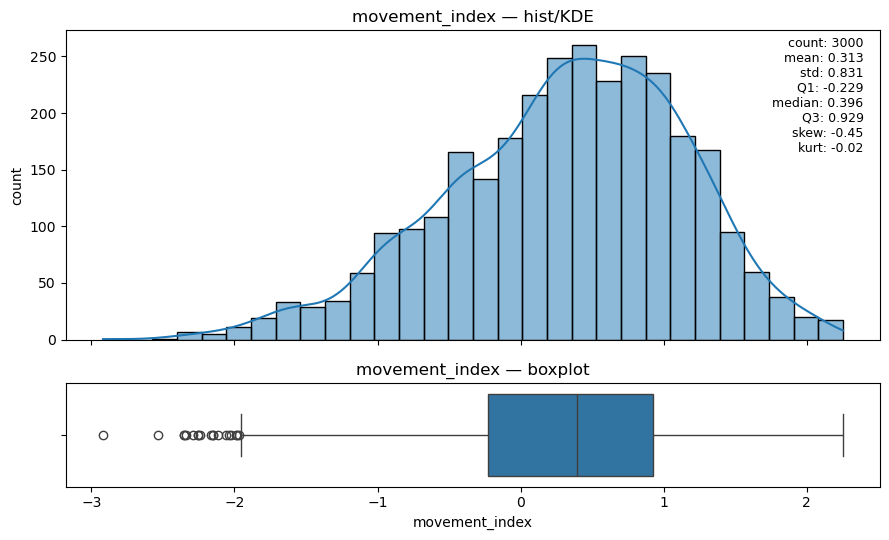

In [25]:
fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(9, 5.5), gridspec_kw={"height_ratios": [3, 1]}, sharex=True
)

# Histograma + KDE
sns.histplot(x, bins=30, kde=True, ax=ax1)
ax1.set(title=f"{col} — hist/KDE", ylabel="count")
ax1.text(0.98, 0.98, stats_txt, transform=ax1.transAxes,
         ha="right", va="top", fontsize=9)

# Boxplot
sns.boxplot(x=x, ax=ax2)
ax2.set(title=f"{col} — boxplot", xlabel=col, ylabel="")

plt.tight_layout()
plt.show()

**mean** = 0,313 > **median** = 0,396, são próximos mas com ligeira assimetria à esquerda que é confirmada pelo **skew**≈ −0,45.  
**kurt** ≈ −0,02, muito perto da distribuição Normal sem caudas pesadas nem leves.  
**Q1** = −0,229, **Q3** = 0,929 → **IQR** ≈ 1,158 (boa dispersão central).  
**Boxplot**: vários outliers na cauda esquerda até cerca de −3, poucos na direita, até ≈ 2,3.  

Distribuição quase simétrica, com uma cauda à esquerda um pouco mais longa mostrando que há algumas faixas com pouca variação rítmica (valores negativos) e muitas com variação moderada/alta (miolo entre ~0 e ~1).

### 2.1.8 intensity_level
  
Esta feature mede a intensidade/perceção de potência da faixa.  
É importante observar o **Boxplot** a mostrar IQR e eventuais extremos.  

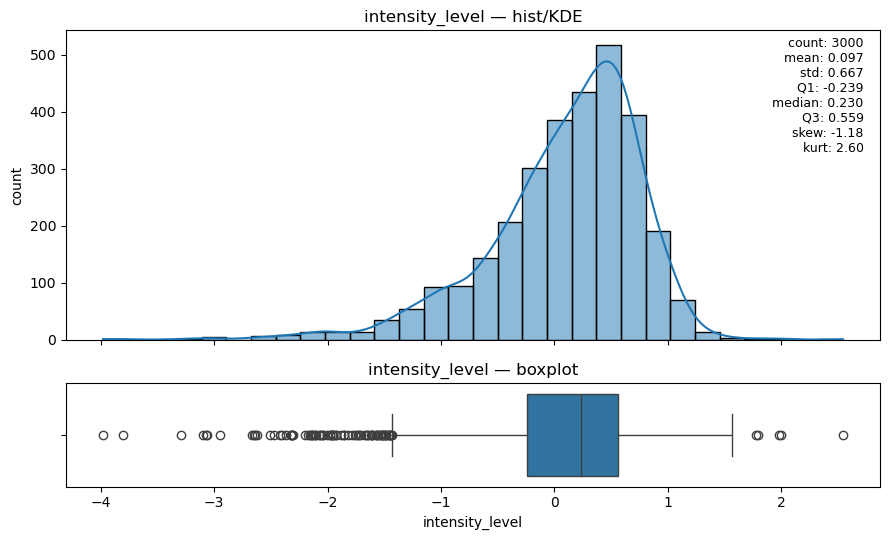

In [29]:
col = "intensity_level"
x = df[col].dropna().astype(float)

# --- estatísticas básicas ---
count  = x.size
mean   = x.mean()
std    = x.std(ddof=1)
q1     = x.quantile(0.25)
median = x.quantile(0.50)
q3     = x.quantile(0.75)
skew   = x.skew()
kurt   = x.kurtosis()

stats_txt = (
    f"count: {count}\n"
    f"mean: {mean:.3f}\n"
    f"std: {std:.3f}\n"
    f"Q1: {q1:.3f}\n"
    f"median: {median:.3f}\n"
    f"Q3: {q3:.3f}\n"
    f"skew: {skew:.2f}\n"
    f"kurt: {kurt:.2f}"
)

# --- figura com hist+KDE (topo) e boxplot (baixo) ---
fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(9, 5.5), gridspec_kw={"height_ratios": [3, 1]}, sharex=True
)

# Histograma + KDE
sns.histplot(x, bins=30, kde=True, ax=ax1)
ax1.set(title=f"{col} — hist/KDE", ylabel="count")
ax1.text(0.98, 0.98, stats_txt, transform=ax1.transAxes,
         ha="right", va="top", fontsize=9)

# Boxplot
sns.boxplot(x=x, ax=ax2)
ax2.set(title=f"{col} — boxplot", xlabel=col, ylabel="")
plt.tight_layout()
plt.show()

**mean** 0,97 < **median** 0,230, consistente com assimetria à esquerda.  
**Assimetria**: **skew** ≈ −1,18 → cauda longa à esquerda (muitos valores baixos/extremos negativos).  
**Caudas**: **kurt** ≈ 2,60, leptocúrtica (caudas pesadas), sendo que há mais pontos muito afastados do centro.  
**IQR**: **Q1** −0,239, **Q3** 0,559, **IQR** ≈ 0,798 mostando uma dispersão moderada no miolo.  
**Boxplot**: muitos outliers à esquerda (até ~−4) e alguns à direita (até ~2,3).

### 2.1.9 verbal_density

Densidade de vocais/letras na faixa  quanto maior, mais presença vocal.
Se existirem faixas instrumentais, pode haver massa em valores mais baixos/negativos.  



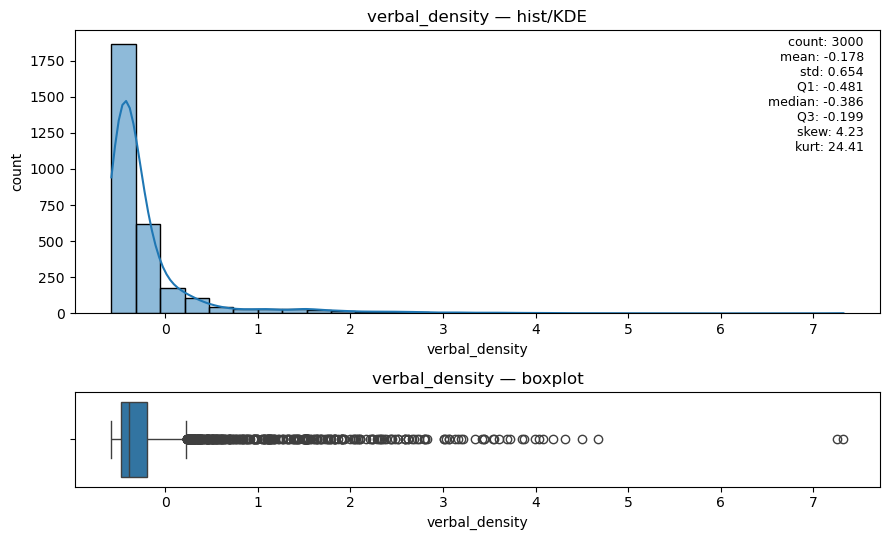

In [30]:
col = "verbal_density"
x = df[col].dropna().astype(float)

# --- estatísticas básicas ---
count  = x.size
mean   = x.mean()
std    = x.std(ddof=1)
q1     = x.quantile(.25)
median = x.quantile(.50)
q3     = x.quantile(.75)
skew   = x.skew()
kurt   = x.kurtosis()

stats_txt = (
    f"count: {count}\n"
    f"mean: {mean:.3f}\n"
    f"std: {std:.3f}\n"
    f"Q1: {q1:.3f}\n"
    f"median: {median:.3f}\n"
    f"Q3: {q3:.3f}\n"
    f"skew: {skew:.2f}\n"
    f"kurt: {kurt:.2f}"
)

fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(9, 5.5), gridspec_kw={"height_ratios": [3, 1]}, sharex=False
)

# Histograma + KDE + Q1/Med/Q3
sns.histplot(x, bins=30, kde=True, ax=ax1)
ax1.set(title=f"{col} — hist/KDE", ylabel="count")
ax1.text(0.98, 0.98, stats_txt, transform=ax1.transAxes,
         ha="right", va="top", fontsize=9)

# Boxplot
sns.boxplot(x=x, ax=ax2)
ax2.set(title=f"{col} — boxplot", xlabel=col, ylabel="")

plt.tight_layout()
plt.show()

**Skew** = 4,23, forte cauda à direita (poucas faixas com densidade vocal muito alta).  
**Kurt** = 24,41, caudas extremamente pesadas (muitos pontos muito afastados do centro).  
**Mediana** = −0,386, **Q3** = −0,199, mais de 75% dos valores são negativos, isto pode indicar que esta feature foi estandardizada.  
O **histograma** concentra-se perto de valores pequenos e negativos, com outliers enormes até ~7,5.  
O **boxplot** confirma uma enxurrada de outliers à direita.

A maior parte das faixas tem baixa presença vocal.  
Um subconjunto muito pequeno tem densidade vocal excecionalmente alta, puxando a média e a dispersão.  

### 2.1.10 positivity_index

Medida contínua que representa uma valência emocional positiva (quão “feliz/positiva” soa a faixa).  
Espera-se próxima de centrada (pode já estar normalizada).

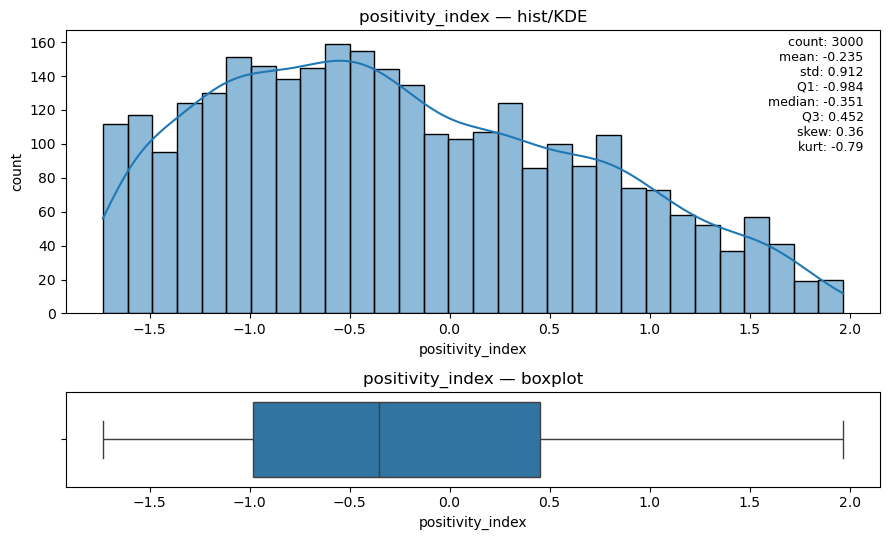

In [32]:
col = "positivity_index"
x = df[col].dropna().astype(float)

# --- estatísticas básicas ---
count  = x.size
mean   = x.mean()
std    = x.std(ddof=1)
q1     = x.quantile(.25)
median = x.quantile(.50)
q3     = x.quantile(.75)
skew   = x.skew()
kurt   = x.kurtosis()

stats_txt = (
    f"count: {count}\n"
    f"mean: {mean:.3f}\n"
    f"std: {std:.3f}\n"
    f"Q1: {q1:.3f}\n"
    f"median: {median:.3f}\n"
    f"Q3: {q3:.3f}\n"
    f"skew: {skew:.2f}\n"
    f"kurt: {kurt:.2f}"
)

# --- figura com hist+KDE (topo) e boxplot (baixo) ---
fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(9, 5.5), gridspec_kw={"height_ratios": [3, 1]}, sharex=False
)

# Histograma + KDE + linhas Q1/Med/Q3
sns.histplot(x, bins=30, kde=True, ax=ax1)
ax1.set(title=f"{col} — hist/KDE", ylabel="count")
ax1.text(0.98, 0.98, stats_txt, transform=ax1.transAxes,
         ha="right", va="top", fontsize=9)

# Boxplot
sns.boxplot(x=x, ax=ax2)
ax2.set(title=f"{col} — boxplot", xlabel=col, ylabel="")

plt.tight_layout()
plt.show()

Distribuição com **leve cauda à direita**: **skew** = 0,36 e **kurtose negativa** = −0,79, que indica uma forma achatada e caudas relativamente leves. O centro está ligeiramente abaixo de zero (**mean** = −0,24 e **median** = −0,35) e o **IQR** é largo (~1,44), mostrando grande diversidade de valência emocional. 

### 2.1.11 signal_power

Esta feature mede a potência do sinal de áudio. Em regra geral não deve ser negativa e tende a apresentar uma assimetria à direita (algumas faixas com potência muito alta).

Esperamos observar no Histograma uma cauda à direita mas com concentração perto de 0.

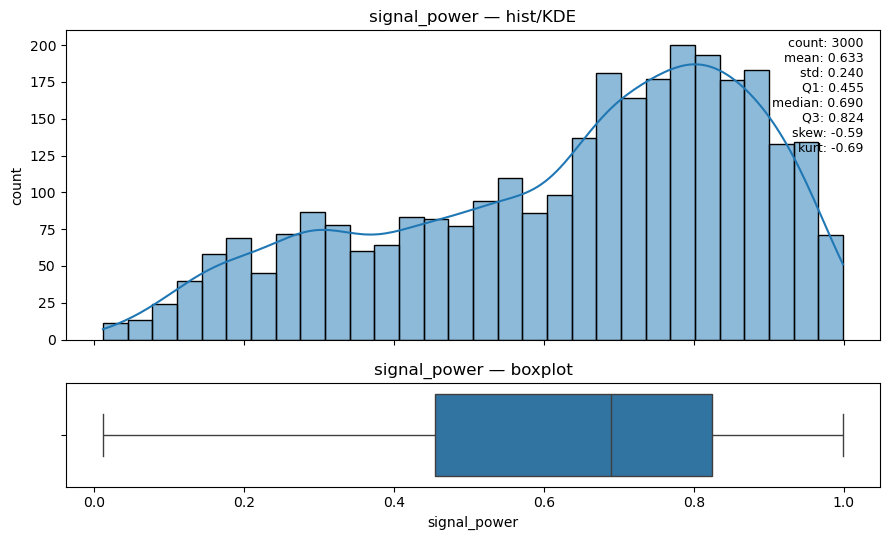

In [33]:
col = "signal_power"
x = df[col].dropna().astype(float)

# --- estatísticas básicas ---
count  = x.size
mean   = x.mean()
std    = x.std(ddof=1)
q1     = x.quantile(.25)
median = x.quantile(.50)
q3     = x.quantile(.75)
skew   = x.skew()
kurt   = x.kurtosis()

stats_txt = (
    f"count: {count}\n"
    f"mean: {mean:.3f}\n"
    f"std: {std:.3f}\n"
    f"Q1: {q1:.3f}\n"
    f"median: {median:.3f}\n"
    f"Q3: {q3:.3f}\n"
    f"skew: {skew:.2f}\n"
    f"kurt: {kurt:.2f}"
)

# --- figura com hist+KDE (topo) e boxplot (baixo) ---
fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(9, 5.5), gridspec_kw={"height_ratios": [3, 1]}, sharex=True
)

sns.histplot(x, bins=30, kde=True, ax=ax1)
ax1.set(title=f"{col} — hist/KDE", ylabel="count")
ax1.text(0.98, 0.98, stats_txt, transform=ax1.transAxes,
         ha="right", va="top", fontsize=9)

sns.boxplot(x=x, ax=ax2)
ax2.set(title=f"{col} — boxplot", xlabel=col, ylabel="")
plt.tight_layout(); plt.show()

Distribuição concentrada em valores médios/altos (**Med** = 0,69 e **IQR** = ~0,37), com **assimetria à esquerda** moderada (**skew** −0,59 e **kurtose negativa** = −0,69), o que indica uma forma achatada e caudas leves. Há poucas observações com potência muito baixa e quase não há extremos altos problemáticos.